# Gaston 介紹

[Gaston](https://github.com/mbaz/Gaston.jl) 提供一組 [Gnuplot](http://www.gnuplot.info/) 的界面。

In [1]:
using Gaston
using SpecialFunctions

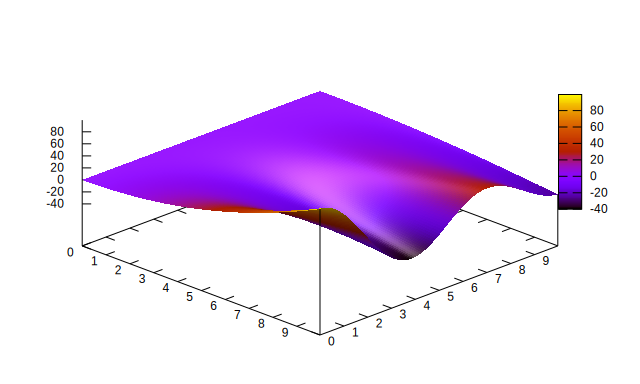

In [2]:
x = y = 0:0.075:10;
postcomm = "set view 45,45; set pm3d lighting primary .5 specular .4"
surf(x, y, (x,y)->besselj0(y)*x^2, plotstyle="pm3d", gpcom=postcomm)

## 淺談 Gnuplot 設定

在 Gnuplot 被呼叫時它會先檢查啟動腳本 `gnuplotrc` 然後查詢使用者的設定檔 `~/.gnuplot` （Wundows 系統的設定檔位於 `%APPDATA%\GNUPLOT.INI`）

這邊提供一個設定的範例：

```sh
set linetype 1 lc rgb "#566573" pt 7
set linetype 2 lc rgb "#EC7063" pt 5
set linetype 3 lc rgb "#A569BD" pt 9
set linetype 4 lc rgb "#5DADE2" pt 11
set linetype 5 lc rgb "#45B39D" pt 13
set linetype 6 lc rgb "#58D68D" pt 6
set linetype 7 lc rgb "#F5B041" pt 4
set linetype 8 lc rgb "#99A3A4" pt 8

set linetype cycle 8
set style data lines
set key noautotitle
set auto fix
set offsets graph .05, graph .05, graph .05, graph .05
```

### Gnuplot 設定小抄

![](https://i.imgur.com/xNZa7Rz.png)

## 安裝

### 1. 安裝 Gnuplot

請參考 [Gnuplot](http://www.gnuplot.info/) 官方網站以及文件。

### 2. 安裝 Gaston

```
julia> ]
(@v1.4) pkg> add Gaston
```



## 一個簡單又完整的範例

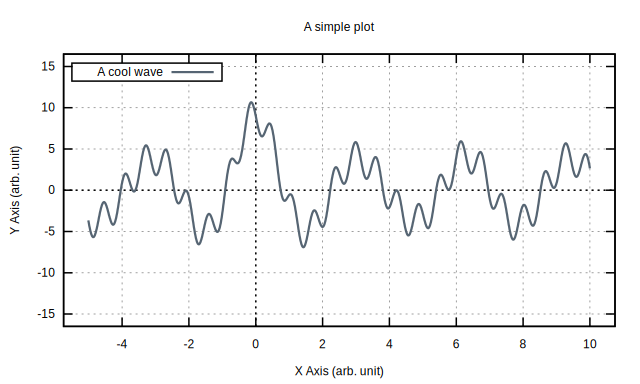

In [3]:
x = -10:0.01:10;
y = @. 5sinc(x) + 4cos(2x) - 2sin(10x);

Gaston.plot(
    # set data
    x, y,
    
    # set plot range
    xrange="[-5:*]", yrange="[-15:15]",
    
    # set styles
    linewidth="1.5",
    xzeroaxis="on", yzeroaxis="on",
    grid="on",
    
    # set labels
    title="A simple plot",
    xlabel="X Axis (arb. unit)",
    ylabel="Y Axis (arb. unit)",
    
    # set legends
    keyoptions="box top left", 
    legend="A cool wave"
)

## 設定 plot style

Plot Style 包含：
* `""`
* `"lines"`
* `"linespoints"`
* `"points"`
* `"impulses"`
* `"boxes"`
* `"errorlines"`
* `"errorbars"`
* `"dots"`
* `"steps"`
* `"fsteps"`
* `"fillsteps"`
* `"financebars"`

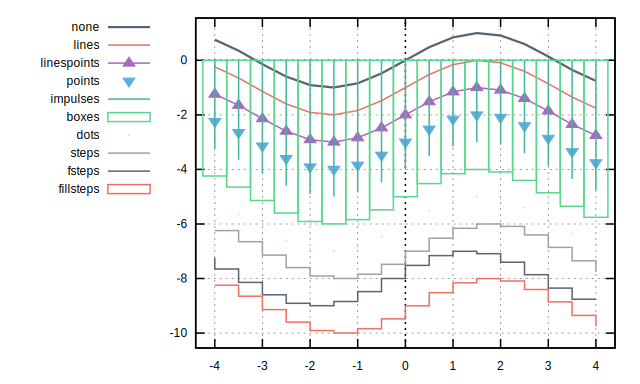

In [4]:
x = -4:0.5:4;
y = @. sin(x);

plot_style = [
    "lines", 
    "linespoints", 
    "points", 
    "impulses", 
    "boxes", 
    "dots", 
    "steps", 
    "fsteps", 
    "fillsteps", 
]

p = Gaston.plot(
    # set data
    x, y,
    
    # set styles
    linewidth="1.5",
    xzeroaxis="on", yzeroaxis="on",
    grid="on",
    
    # set legends
    keyoptions="outside left", 
    legend="none"
)

for (i, style) = enumerate(plot_style)
    Gaston.plot!(x, y.-i, plotstyle=style, legend=style)
end
p